In [548]:
from category_encoders.hashing import HashingEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AdD/ceia_add_tps/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [488]:
# Leer el archivo CSV
productos_df = pd.read_csv('productos.zip', sep='|')

productos_df.head()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/2831869706.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  productos_df = pd.read_csv('productos.zip', sep='|')


,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI,NaN,NaN,NaN,NaN
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN
4,10,1.0,2.0,7.791720e+12,1.0,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM,NaN,NaN,NaN,NaN


In [489]:
productos_df.dtypes

id_comercio                              object
id_bandera                              float64
id_sucursal                             float64
id_producto                             float64
productos_ean                           float64
productos_descripcion                    object
productos_cantidad_presentacion         float64
productos_unidad_medida_presentacion     object
productos_marca                          object
productos_precio_lista                  float64
productos_precio_referencia             float64
productos_cantidad_referencia           float64
productos_unidad_medida_referencia       object
productos_precio_unitario_promo1        float64
productos_leyenda_promo1                 object
productos_precio_unitario_promo2        float64
productos_leyenda_promo2                float64
dtype: object

In [490]:
productos_df.describe()

,id_bandera,id_sucursal,id_producto,productos_ean,productos_cantidad_presentacion,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
count,2.232853e+06,2.232853e+06,2.232853e+06,2.232853e+06,2232853.0,2.232853e+06,2.232853e+06,2.232853e+06,6.870200e+04,0.0,0.0
mean,2.065017e+00,3.166739e+02,7.322620e+12,9.777025e-01,1.0,1.050002e+04,2.112866e+04,3.965329e+02,6.686930e+04,NaN,NaN
std,8.728486e-01,2.318601e+02,1.653917e+12,1.476493e-01,0.0,8.212710e+04,9.270248e+04,5.130412e+02,2.463596e+05,NaN,NaN
min,1.000000e+00,1.000000e+00,4.008140e+07,0.000000e+00,1.0,3.600000e+01,2.700000e-01,0.000000e+00,4.500000e+01,NaN,NaN
25%,1.000000e+00,1.370000e+02,7.790315e+12,1.000000e+00,1.0,1.619000e+03,3.610000e+03,8.500000e+01,1.290000e+03,NaN,NaN
50%,2.000000e+00,2.560000e+02,7.791720e+12,1.000000e+00,1.0,2.790000e+03,8.350000e+03,2.370000e+02,1.990000e+03,NaN,NaN
75%,3.000000e+00,4.960000e+02,7.794521e+12,1.000000e+00,1.0,5.099000e+03,1.695000e+04,5.000000e+02,4.500000e+03,NaN,NaN
max,3.000000e+00,8.100000e+02,9.002490e+12,1.000000e+00,1.0,7.349000e+06,7.349000e+06,8.000000e+03,6.849000e+06,NaN,NaN


In [491]:
productos_df.tail()

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
2232849,10,2.0,512.0,2.509067e+12,0.0,QUESO CREMOSO FRACC SILVIA,1.0,KGM,S/D,14359.0,14359.0,1000.0,GRM,790.0,Promo A valida desde el 02/05/2025 hasta 04/05...,NaN,NaN
2232850,10,3.0,736.0,7.790010e+12,1.0,ACOND HIDRATACION INTENSA JOHNSONS KIDS X 200 CC,1.0,UNI,JOHNSONS BABY,4965.0,24825.0,200.0,CM3,2310.0,Promo A valida desde el 17/04/2025 hasta 20/05...,NaN,NaN
2232851,10,3.0,748.0,7.730908e+12,1.0,JUGO EN POLVO MIX FRUTAL RINDE DOS X 13GRS,1.0,UNI,RINDE DOS,559.0,4300.0,13.0,GRS,NaN,NaN,NaN,NaN
2232852,10,3.0,450.0,7.790070e+12,1.0,FIDEOS INTEGRALES SPAGHETTI MATARAZZO X 500 GRS,1.0,UNI,MATARAZZO,2009.0,4018.0,500.0,GRM,NaN,NaN,NaN,NaN
2232853,Ultima actualización: 2025-05-02T05:00:43-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos el último registro del csv ya que es irrelevante.

In [492]:
productos_df = productos_df.drop(productos_df.index[-1])

## **Revisión de nulos**

In [493]:
productos_df.isnull().sum()

id_comercio                                   0
id_bandera                                    0
id_sucursal                                   0
id_producto                                   0
productos_ean                                 0
productos_descripcion                         0
productos_cantidad_presentacion               0
productos_unidad_medida_presentacion          0
productos_marca                               0
productos_precio_lista                        0
productos_precio_referencia                   0
productos_cantidad_referencia                 0
productos_unidad_medida_referencia            0
productos_precio_unitario_promo1        2164151
productos_leyenda_promo1                2164151
productos_precio_unitario_promo2        2232853
productos_leyenda_promo2                2232853
dtype: int64

In [494]:
len(productos_df)

2232853

Se puede observar que las columnas productos_precio_unitario_promo1, productos_leyenda_promo1, productos_precio_unitario_promo2 y productos_leyenda_promo2 son en su mayoría nulos.

Verificamos cuántos registros tienen el código de producto EAN y cuántos no.

In [495]:
productos_df['productos_ean'].value_counts()

productos_ean
1.0    2183066
0.0      49787
Name: count, dtype: int64

In [496]:

productos_df['productos_ean'].duplicated().sum()

np.int64(2232851)

Verificamos que no haya un id_producto repetido como EAN y como NO EAN.

In [497]:
mask = productos_df.groupby('id_producto')['productos_ean'].nunique() > 1

# Filtrar el DataFrame original con los valores que cumplen la condición
df_filtrado = productos_df[productos_df['id_producto'].isin(mask[mask].index)]
df_filtrado.head()

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2


## **Determinamos las columnas de interés**

Descartamos inicialmente las columnas productos_precio_unitario_promo1, productos_leyenda_promo1, productos_precio_unitario_promo2 y productos_leyenda_promo2 por la gran cantidad de valores nulos que tienen. Y descartamos productos_descripcion porque al ser texto plano es difícil de procesar.

In [498]:
columnas_de_interes = [ 
       'id_sucursal',
       'id_producto',
       'productos_ean',
       'productos_cantidad_presentacion',
       'productos_unidad_medida_presentacion',
       'productos_marca',
       'productos_precio_lista',
       'productos_precio_referencia',
       'productos_cantidad_referencia',
       'productos_unidad_medida_referencia',
]

In [499]:
productos_df = productos_df[columnas_de_interes]
productos_df.head()

,id_sucursal,id_producto,productos_ean,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia
0,63.0,7.790771e+12,1.0,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI
1,711.0,7.790070e+12,1.0,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM
2,44.0,7.622202e+12,1.0,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM
3,62.0,7.791293e+12,1.0,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3
4,2.0,7.791720e+12,1.0,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM


## **Mergeamos el dataset de productos con el de sucursales**

In [500]:
# Mergear con sucursales
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype(int)
sucursales_df = pd.read_excel('./sucursales/sucursales_procesado.xlsx')
# Uno los dataframe por la columna de id_sucursal
productos_df = pd.merge(productos_df, sucursales_df, on='id_sucursal', how='inner')
display(productos_df.head())

,id_sucursal,id_producto,productos_ean,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia
0,63,7.790771e+12,1.0,1.0,UNI,NOSOTRAS,2809.0,175.56,16.0,UNI,1,Caleta Olivia,Hipermercado,762.0,-46.444906,-67.533789,NaN,9011,Santa Cruz,AR-Z
1,711,7.790070e+12,1.0,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,3,Álvarez Thomas 372,Autoservicio,372.0,-34.581280,-58.449050,Colegiales,1427,Ciudad Autónoma de Buenos Aires,AR-C
2,44,7.622202e+12,1.0,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,1,Resistencia II,Hipermercado,NaN,-27.438800,-58.987383,NaN,3500,Resistencia,AR-H
3,62,7.791293e+12,1.0,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,2,Champagnat,Hipermercado,NaN,-34.449813,-58.916319,NaN,1629,Pilar,AR-B
4,2,7.791720e+12,1.0,1.0,UNI,BULNEZ,2990.0,3624.24,825.0,GRM,1,Vicente López,Hipermercado,215.0,-34.532302,-58.468176,NaN,1638,Vicente López,AR-B


## **Modificamos los tipos de las columnas**

In [501]:
productos_df.dtypes

id_sucursal                               int64
id_producto                             float64
productos_ean                           float64
productos_cantidad_presentacion         float64
productos_unidad_medida_presentacion     object
productos_marca                          object
productos_precio_lista                  float64
productos_precio_referencia             float64
productos_cantidad_referencia           float64
productos_unidad_medida_referencia       object
id_bandera                                int64
sucursales_nombre                        object
sucursales_tipo                          object
sucursales_numero                       float64
sucursales_latitud                      float64
sucursales_longitud                     float64
sucursales_barrio                        object
sucursales_codigo_postal                  int64
sucursales_localidad                     object
sucursales_provincia                     object
dtype: object

In [502]:
# Columnas de sucursales
productos_df['id_bandera'] = productos_df['id_bandera'].astype('category')
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['sucursales_nombre'] = productos_df['sucursales_nombre'].astype('category')
productos_df['sucursales_tipo'] = productos_df['sucursales_tipo'].astype('category')
productos_df['sucursales_numero'] = productos_df['sucursales_numero'].astype('category')
productos_df['sucursales_latitud'] = productos_df['sucursales_latitud'].astype(float)
productos_df['sucursales_longitud'] = productos_df['sucursales_longitud'].astype(float)
productos_df['sucursales_barrio'] = productos_df['sucursales_barrio'].astype('category')
productos_df['sucursales_codigo_postal'] = productos_df['sucursales_codigo_postal'].astype('category')
productos_df['sucursales_localidad'] = productos_df['sucursales_localidad'].astype('category')
productos_df['sucursales_provincia'] = productos_df['sucursales_provincia'].astype('category')

# Columnas de productos
productos_df['productos_ean'] = productos_df['productos_ean'].astype(int).astype(str).astype('category')
# Convertir la columna 'id_producto' a categórica
productos_df['id_producto'] = productos_df['id_producto'].astype(int).astype(str).astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')

#  Normalizamos los precios agrupando por cada id_producto
scaler = StandardScaler()
productos_df['productos_precio_referencia_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)
productos_df['productos_precio_lista_zscore'] = productos_df.groupby('id_producto')['productos_precio_lista'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/655109432.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df['productos_precio_referencia_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/655109432.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df['productos_precio_lista_zscore'] = productos_df.groupby('id_producto')['productos_precio_lista'].transform(


## **Problema de clasificación planteado**

Se plantea predecir el barrio de CABA al que pertenece un producto a partir de algunos de los features del dataset original.

In [503]:
# El código de provincia de CABA es 'AR-C'
productos_df_new = productos_df[
    (productos_df['sucursales_provincia'] == 'AR-C')
]

In [504]:
# Luego de cada filtro debemos eliminar las categorías no utilizadas
for col in productos_df_new.select_dtypes(['category']).columns:
    productos_df_new[col] = productos_df_new[col].cat.remove_unused_categories()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/8695126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productos_df_new[col] = productos_df_new[col].cat.remove_unused_categories()


## **Corrección de desbalances**

In [505]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

In [506]:
# Función para graficar la distribución de la variable target
def plot(y):
    fig, axes = plt.subplots(figsize=(40, 15))
    sns.countplot(x=y, hue=y, palette="Set2", ax=axes)
    
    axes.set_xlabel("Survived")
    axes.set_ylabel("Cantidad")
    axes.set_title(f"Distribución de la variable {target}")

    plt.tight_layout()
    plt.show()

In [507]:
# Evaluación del desbalance
def info(y):
    print("Proporción de clases:")
    print(y.value_counts(normalize=True))
    entropy = shannon_entropy(y)
    print("\nEntropía de Shannon:", entropy)
    plot(y)

Proporción de clases:
sucursales_barrio
Palermo             0.093419
Caballito           0.086349
Belgrano            0.078467
San Nicolas         0.075379
Recoleta            0.074136
Villa Urquiza       0.047507
Villa del Parque    0.047241
Almagro             0.039340
Boedo               0.032493
Villa Crespo        0.026718
Mataderos           0.023416
Monserrat           0.023175
Retiro              0.020520
Parque Patricios    0.020072
Floresta            0.019861
Flores              0.019572
Nuñez               0.018818
La Boca             0.018576
Santa Rita          0.018421
San Cristobal       0.015431
Congreso            0.015348
Balvanera           0.015154
Colegiales          0.014784
Liniers             0.014071
Chacarita           0.012164
Villa Luro          0.011770
Naon                0.011719
Once                0.011592
San telmo           0.011465
Saavedra            0.011420
Parque Chacabuco    0.008609
Barracas            0.008449
Lugano              0.008365
Vil

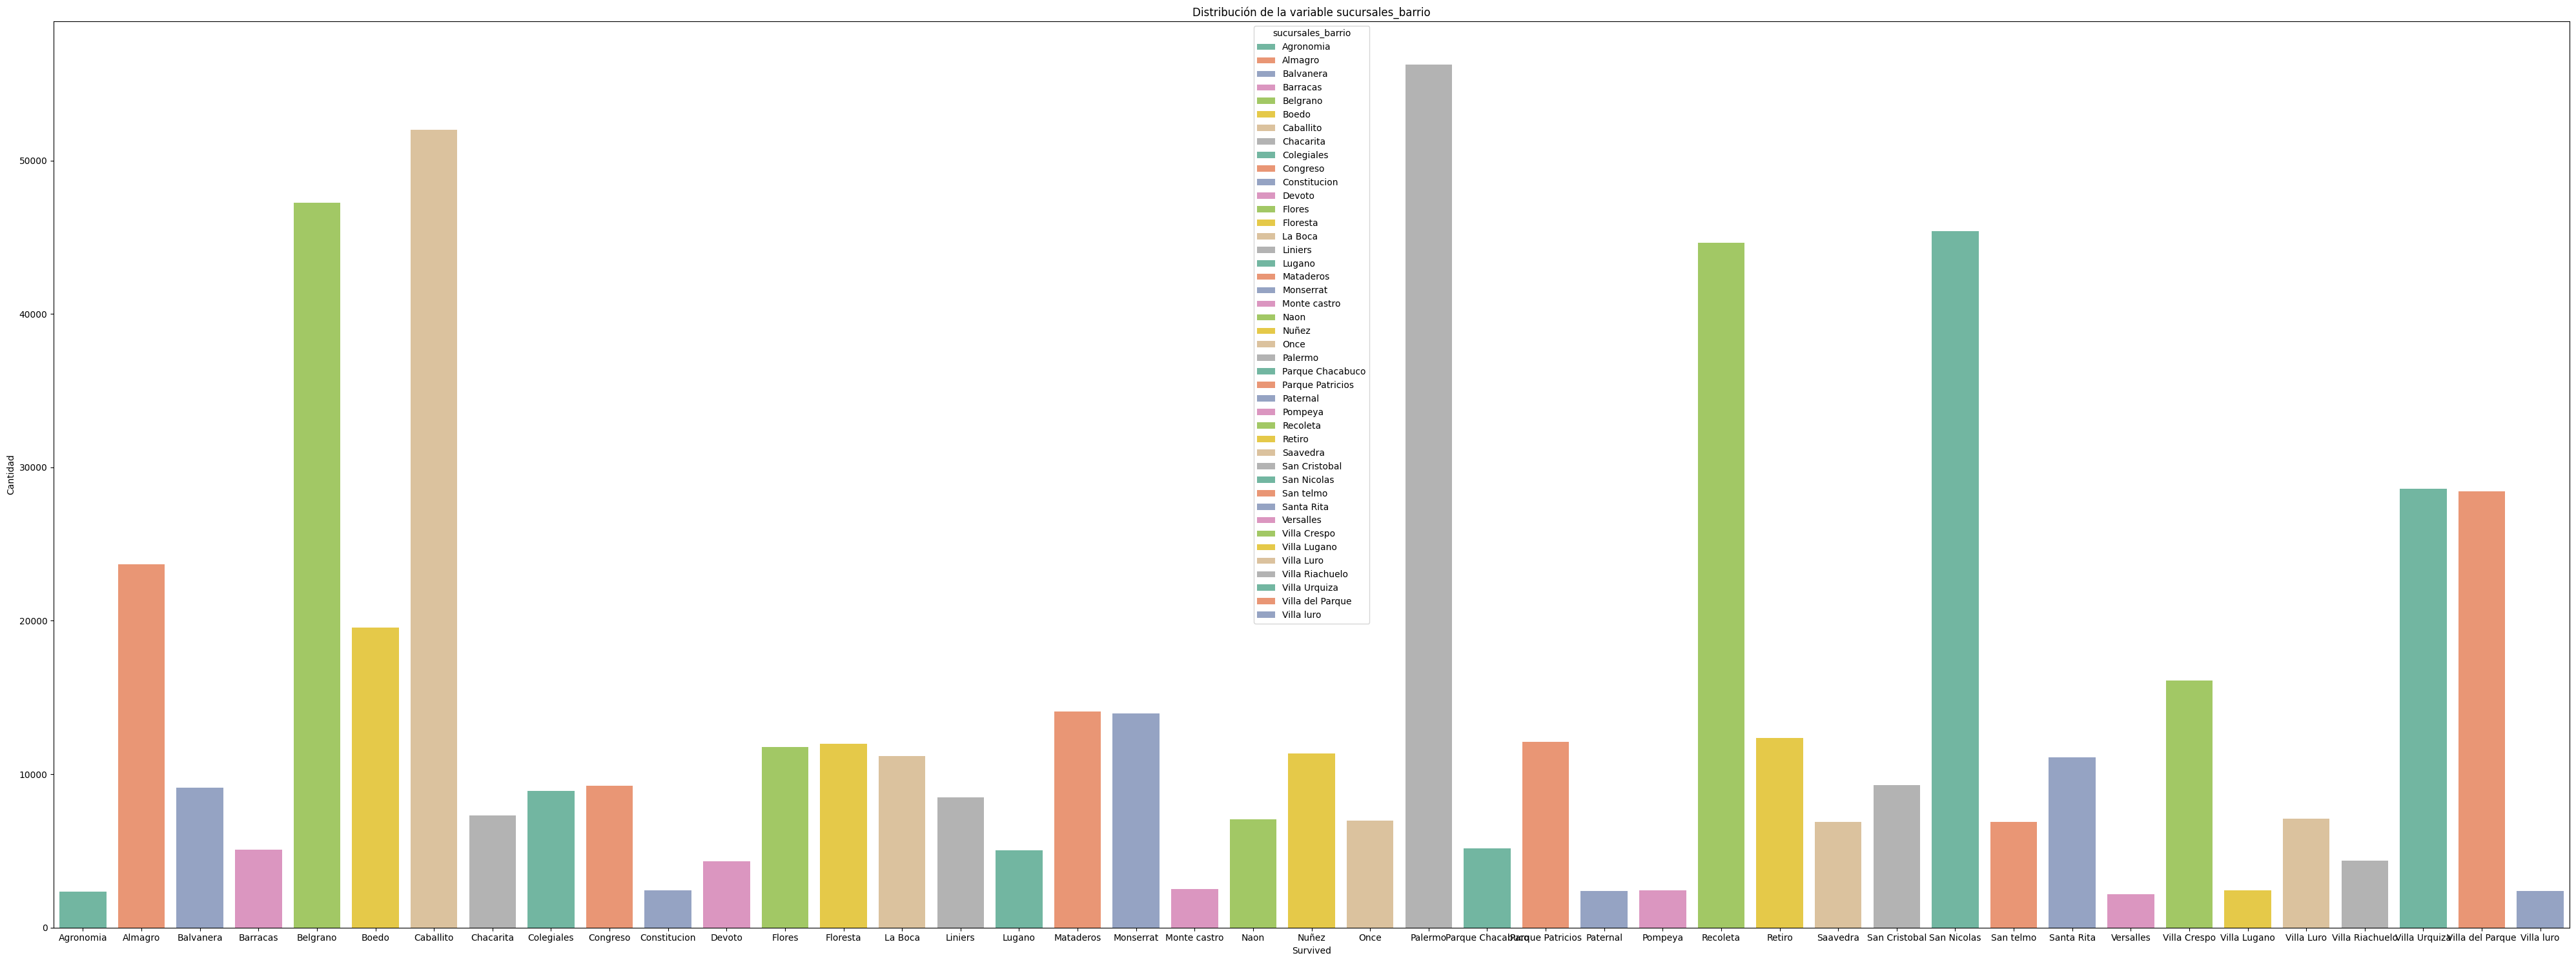

In [508]:
# Separo el dataset en X (variables) y (target)
target = 'sucursales_barrio'
X = productos_df_new.drop(columns=[target])
y = productos_df_new[target]
info(y)

In [509]:
productos_df_new["id_sucursal"].nunique()

327

In [510]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_new.groupby('id_producto')['id_sucursal'].nunique()

# Filtrar los productos que están en todas las sucursales, que en nuestro caso son 327
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 327].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_new[productos_df_new['id_producto'].isin(productos_en_todas_sucursales)]

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/1472335093.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_new.groupby('id_producto')['id_sucursal'].nunique()


In [511]:
# Luego de cada filtro debemos eliminar las categorías no utilizadas
for col in productos_df_en_varias_sucursales.select_dtypes(['category']).columns:
    productos_df_en_varias_sucursales[col] = productos_df_en_varias_sucursales[col].cat.remove_unused_categories()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/3490469204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productos_df_en_varias_sucursales[col] = productos_df_en_varias_sucursales[col].cat.remove_unused_categories()


In [512]:
productos_df_en_varias_sucursales['sucursales_barrio'].value_counts()

sucursales_barrio
Palermo             1950
Caballito           1716
Belgrano            1638
San Nicolas         1482
Recoleta            1482
Villa Urquiza       1014
Villa del Parque     936
Almagro              780
Boedo                624
Villa Crespo         546
Monserrat            468
Mataderos            468
Santa Rita           390
Retiro               390
Parque Patricios     390
Nuñez                390
La Boca              390
Floresta             390
Flores               390
Balvanera            312
Congreso             312
Liniers              312
Colegiales           312
San Cristobal        312
Naon                 234
Once                 234
San telmo            234
Villa Luro           234
Chacarita            234
Saavedra             234
Lugano               156
Barracas             156
Villa Riachuelo      156
Parque Chacabuco     156
Devoto               156
Villa Lugano          78
Agronomia             78
Versalles             78
Pompeya               78
Paterna

Para balancear los registros nos quedamos con los barrios que tienen más de 4 sucursales.

In [513]:
sucursales_por_barrio = productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({
    'id_sucursal': 'nunique'
})
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['sucursales_barrio'].isin(sucursales_por_barrio[sucursales_por_barrio['id_sucursal'] > 4].index)]

productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({
    'id_sucursal': 'nunique'
}).head(10)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/3989233239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sucursales_por_barrio = productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_10954/3989233239.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales.groupby('sucursales_barrio').agg({


,id_sucursal
sucursales_barrio,
Agronomia,0
Almagro,10
Balvanera,0
Barracas,0
Belgrano,21
Boedo,8
Caballito,22
Chacarita,0
Colegiales,0


In [514]:
# Luego de cada filtro debemos eliminar las categorías no utilizadas
for col in productos_df_en_varias_sucursales.select_dtypes(['category']).columns:
    productos_df_en_varias_sucursales[col] = productos_df_en_varias_sucursales[col].cat.remove_unused_categories()

Proporción de clases:
sucursales_barrio
Palermo             0.123153
Caballito           0.108374
Belgrano            0.103448
San Nicolas         0.093596
Recoleta            0.093596
Villa Urquiza       0.064039
Villa del Parque    0.059113
Almagro             0.049261
Boedo               0.039409
Villa Crespo        0.034483
Monserrat           0.029557
Mataderos           0.029557
La Boca             0.024631
Parque Patricios    0.024631
Floresta            0.024631
Retiro              0.024631
Flores              0.024631
Santa Rita          0.024631
Nuñez               0.024631
Name: proportion, dtype: float64

Entropía de Shannon: 3.9798833220074648


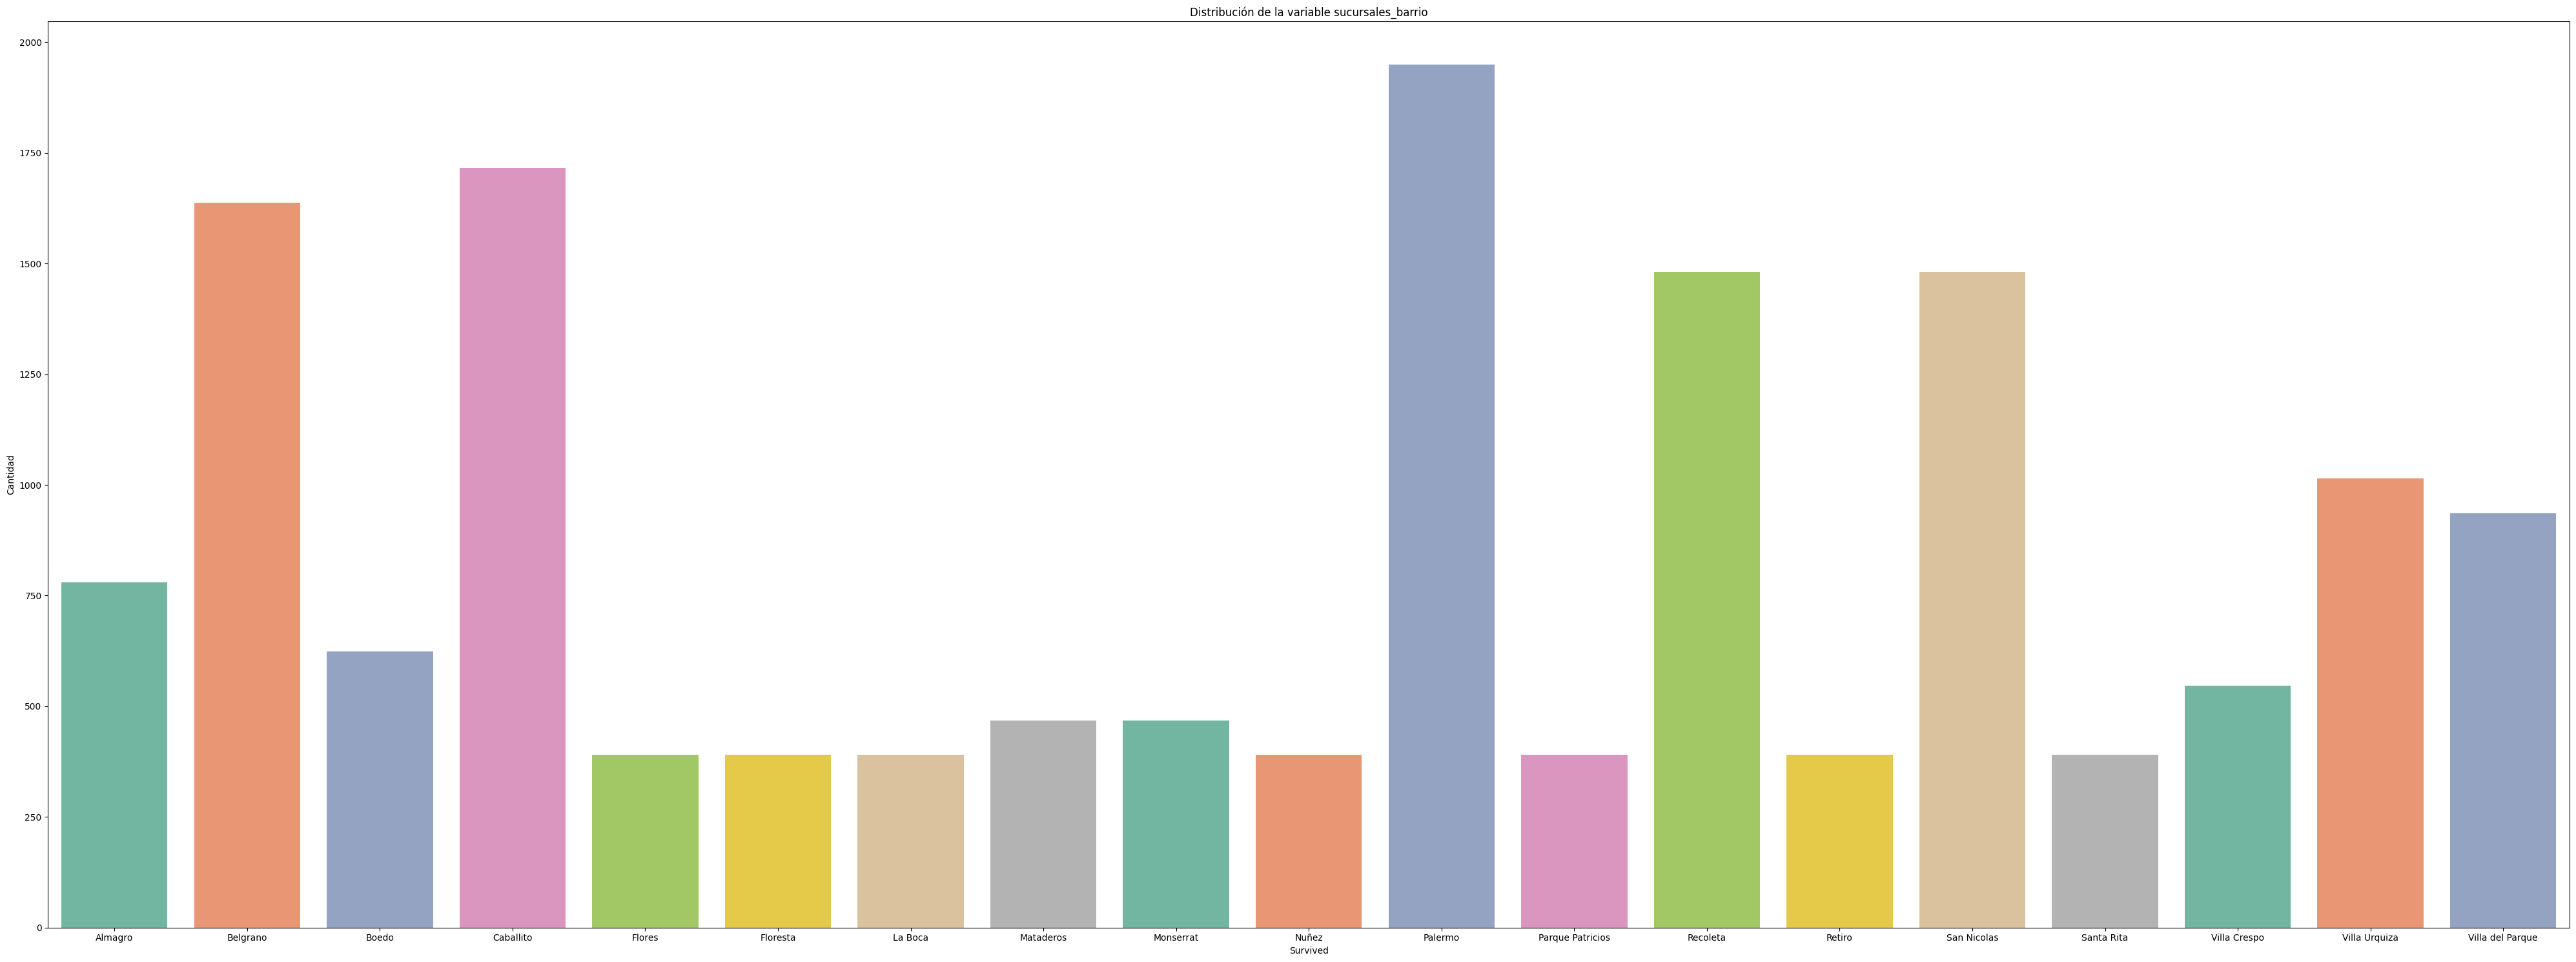

In [515]:
# Separo el dataset en X (variables) y (target)
target = 'sucursales_barrio'
X = productos_df_en_varias_sucursales.drop(columns=[target])
y = productos_df_en_varias_sucursales[target]
info(y)

## **Transformación de variables**

Iniciamos analizando la cantidad de valores únicos de las variables categóricas con el fin de analizar si vale la pena utilizarlas y por ende realizarles una transformación.

In [516]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15834 entries, 256 to 2232708
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           15834 non-null  category
 1   id_producto                           15834 non-null  category
 2   productos_ean                         15834 non-null  category
 3   productos_cantidad_presentacion       15834 non-null  float64 
 4   productos_unidad_medida_presentacion  15834 non-null  category
 5   productos_marca                       15834 non-null  category
 6   productos_precio_lista                15834 non-null  float64 
 7   productos_precio_referencia           15834 non-null  float64 
 8   productos_cantidad_referencia         15834 non-null  float64 
 9   productos_unidad_medida_referencia    15834 non-null  category
 10  id_bandera                            15834 non-null  category
 11  suc

In [517]:
for col in X.select_dtypes(['category']).columns:
    print(f'Columna: {col}, valores únicos: {X[col].nunique()}')

Columna: id_sucursal, valores únicos: 203
Columna: id_producto, valores únicos: 78
Columna: productos_ean, valores únicos: 1
Columna: productos_unidad_medida_presentacion, valores únicos: 1
Columna: productos_marca, valores únicos: 41
Columna: productos_unidad_medida_referencia, valores únicos: 3
Columna: id_bandera, valores únicos: 1
Columna: sucursales_nombre, valores únicos: 203
Columna: sucursales_tipo, valores únicos: 2
Columna: sucursales_numero, valores únicos: 198
Columna: sucursales_codigo_postal, valores únicos: 76
Columna: sucursales_localidad, valores únicos: 1
Columna: sucursales_provincia, valores únicos: 1


In [518]:
for col in X.select_dtypes(['category']).columns:
    if X[col].nunique() == 1:
        print(f'Columna: {col} tiene solo un valor único, eliminándola.')
        X = X.drop(columns=[col])

Columna: productos_ean tiene solo un valor único, eliminándola.
Columna: productos_unidad_medida_presentacion tiene solo un valor único, eliminándola.
Columna: id_bandera tiene solo un valor único, eliminándola.
Columna: sucursales_localidad tiene solo un valor único, eliminándola.
Columna: sucursales_provincia tiene solo un valor único, eliminándola.


In [519]:
bajacard = [
    'productos_unidad_medida_referencia',
    'sucursales_tipo'
]

altacard = [
    'id_sucursal',
    'id_producto',
    'productos_marca',
    'sucursales_nombre',
    'sucursales_numero',
    'sucursales_codigo_postal'
]

In [520]:
# Esta función fuerza el tipo de datos a string
def convertir_a_string(X):
    return X.astype(str)

transformar_bajacard = Pipeline(steps=[
    ('to_str', FunctionTransformer(convertir_a_string, validate=False)),
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputación de valores faltantes con la moda (aunque no lo necesitamos porque no hay nulos)
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # drop=first para reducir los features
])

transformar_altacard = Pipeline(steps=[
    ('to_str', FunctionTransformer(convertir_a_string, validate=False)),
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputación de valores faltantes con la moda (aunque no lo necesitamos porque no hay nulos)
    ('hashing_encoder', HashingEncoder(n_components=8, drop_invariant=True)), # drop_invariant=True: elimina columnas sin varianza
    ('scaler', StandardScaler()),
])

In [521]:
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', transformar_bajacard, bajacard),
        ('nom', transformar_altacard, altacard)
    ],
    remainder='passthrough'  # para conservar columnas no transformadas
)

In [522]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X, y)

pipeline

/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AdD/ceia_add_tps/.venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bin',
                                                  Pipeline(steps=[('to_str',
                                                                   FunctionTransformer(func=<function convertir_a_string at 0x346a9bd80>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['productos_unidad_medida_referencia',
                                                   'sucu...
                                                  Pipeline(steps=[('to_str',
                                                                   FunctionTransformer(func=<function convertir_a_string at 0x346a9bd80>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hashing_encoder',
                                                                   HashingEncoder(drop_invariant=True,
                                                                                  max_process=5)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id_sucursal', 'id_producto',
                                                   'productos_marca',
                                                   'sucursales_nombre',
                                                   'sucursales_numero',
                                                   'sucursales_codigo_postal'])]))])

In [523]:
X_procesado = pipeline.transform(X)

In [524]:
# Extraer transformadores por nombre
onehot = pipeline.named_steps['preprocessor'].named_transformers_['bin'].named_steps['onehot']
hashing = pipeline.named_steps['preprocessor'].named_transformers_['nom'].named_steps['hashing_encoder']

# Columnas de OneHotEncoder
onehot_features = onehot.get_feature_names_out(bajacard)

# Columnas de HashingEncoder (no tiene nombres, se generan como hash_0, hash_1, ...)
hashing_features = [f"hash_{i}" for i in range(hashing.n_components)]

# Agregar nombres de columnas "passthrough"
passthrough_cols = [col for col in X.columns if col not in bajacard + altacard]

# Concatenar todos los nombres
final_feature_names = list(onehot_features) + hashing_features + passthrough_cols

X_preproc = pd.DataFrame(X_procesado, columns=final_feature_names, index=X.index)

X_preproc.head(10)

,productos_unidad_medida_referencia_GRM,productos_unidad_medida_referencia_UNI,sucursales_tipo_Supermercado,hash_0,hash_1,hash_2,hash_3,hash_4,hash_5,hash_6,hash_7,productos_cantidad_presentacion,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,sucursales_latitud,sucursales_longitud,productos_precio_referencia_zscore,productos_precio_lista_zscore
256,1.0,0.0,0.0,-0.930420,-0.827499,-0.777468,-0.916155,2.711259,-0.154349,1.721569,-0.847191,1.0,2490.0,3036.59,820.0,-34.587782,-58.397900,-0.084288,-0.084290
312,0.0,0.0,0.0,0.270743,-0.827499,0.582650,0.371471,0.193218,-1.276980,-0.908624,1.722868,1.0,1679.0,3358.00,500.0,-34.635113,-58.405779,0.403181,0.403181
318,1.0,0.0,0.0,-0.930420,-0.827499,0.582650,-0.916155,1.452239,-1.276980,3.036666,-0.847191,1.0,1390.0,2780.00,500.0,-34.587782,-58.397900,0.084440,0.084440
320,0.0,1.0,0.0,-0.930420,1.894275,0.582650,-0.916155,0.193218,0.968281,-0.908624,-0.847191,1.0,3627.0,3627.00,1.0,-34.557692,-58.448568,0.000000,0.000000
399,0.0,1.0,0.0,-0.930420,0.533388,1.942768,-0.916155,-1.065802,-1.276980,0.406472,1.722868,1.0,11190.0,11190.00,1.0,-34.601177,-58.378613,0.000000,0.000000
634,0.0,1.0,0.0,-0.930420,-0.827499,0.582650,-0.916155,-1.065802,0.968281,0.406472,1.722868,1.0,1850.0,18.50,100.0,-34.583540,-58.403812,-0.154162,-0.154162
918,0.0,0.0,0.0,1.471907,0.533388,-0.777468,-0.916155,0.193218,0.968281,-0.908624,-0.847191,1.0,5315.0,13986.84,380.0,-34.613367,-58.493678,0.047707,0.047710
1107,0.0,0.0,1.0,-0.930420,1.894275,-0.777468,-0.916155,0.193218,-0.154349,0.406472,0.437839,1.0,3509.0,9747.22,360.0,-34.599672,-58.372053,-0.000166,-0.000166
1244,0.0,0.0,0.0,-0.930420,0.533388,-0.777468,-0.916155,1.452239,-0.154349,0.406472,0.437839,1.0,9669.0,13812.86,700.0,-34.650719,-58.490753,0.094625,0.094623
1364,1.0,0.0,0.0,0.270743,-0.827499,-0.777468,1.659098,1.452239,-0.154349,-0.908624,-0.847191,1.0,1190.0,2380.00,500.0,-34.599811,-58.433801,-0.171028,-0.171028


## **Selección de features**

El problema de clasificación planteado busca predecir una variable categórica a partir de variables numéricas como categóricas, es decir:

| Variable de Entrada | Variable de Salida |
|---------------------|--------------------|
| Numérica            | Categórica         |
| Categórica          | Categórica         |

Por lo tanto para poder contemplar ambos casos es pertinente utilizar el tipo de filtro "Información mutua" que nos va a permitir capturar relaciones no lineales.

In [526]:
X_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15834 entries, 256 to 2232708
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   productos_unidad_medida_referencia_GRM  15834 non-null  float64
 1   productos_unidad_medida_referencia_UNI  15834 non-null  float64
 2   sucursales_tipo_Supermercado            15834 non-null  float64
 3   hash_0                                  15834 non-null  float64
 4   hash_1                                  15834 non-null  float64
 5   hash_2                                  15834 non-null  float64
 6   hash_3                                  15834 non-null  float64
 7   hash_4                                  15834 non-null  float64
 8   hash_5                                  15834 non-null  float64
 9   hash_6                                  15834 non-null  float64
 10  hash_7                                  15834 non-null  flo

In [528]:
selector_mi = SelectKBest(score_func=mutual_info_classif, k=19)
selector_mi.fit(X_preproc, y)

# Aplicar el filtro a train
X_selected = selector_mi.transform(X_preproc)

selected_indices = selector_mi.get_support()
selected_features = X_preproc.columns[selected_indices]
scores = selector_mi.scores_[selected_indices]
print("\nCaracterísticas seleccionadas (Inf. mutua):")
for feature, score in zip(selected_features, scores):
    print(f"{feature}: {score:.4f}")

print(f"\nShape del dataset después de la selección): {X_selected.shape}")


Características seleccionadas (Inf. mutua):
productos_unidad_medida_referencia_GRM: 0.0144
productos_unidad_medida_referencia_UNI: 0.0000
sucursales_tipo_Supermercado: 0.0222
hash_0: 0.0813
hash_1: 0.0828
hash_2: 0.0439
hash_3: 0.1044
hash_4: 0.1351
hash_5: 0.0546
hash_6: 0.0473
hash_7: 0.0769
productos_cantidad_presentacion: 0.0000
productos_precio_lista: 0.0000
productos_precio_referencia: 0.0000
productos_cantidad_referencia: 0.0000
sucursales_latitud: 2.7592
sucursales_longitud: 2.7592
productos_precio_referencia_zscore: 0.0000
productos_precio_lista_zscore: 0.0000

Shape del dataset después de la selección): (15834, 19)


Como se puede observar las columnas sucursales_latitud y sucursales_longitud tienen un alto valor predictivo sobre el target, algo que tiene bastante sentido ya que son coordenadas geográficas. Eliminamos todos los que nos dieron un valor de información mutua 0.

In [530]:
features_to_drop = []
for feature, score in zip(selected_features, scores):
    if round(score, 3) == 0:
        features_to_drop.append(feature)
        print(f"Eliminando {feature} con score {score:.4f} porque es 0")
X_preproc = X_preproc.drop(columns=features_to_drop)
print(f"\nShape del dataset después de eliminar features con score 0: {X_preproc.shape}")

Eliminando productos_unidad_medida_referencia_UNI con score 0.0000 porque es 0
Eliminando productos_cantidad_presentacion con score 0.0000 porque es 0
Eliminando productos_precio_lista con score 0.0000 porque es 0
Eliminando productos_precio_referencia con score 0.0000 porque es 0
Eliminando productos_cantidad_referencia con score 0.0000 porque es 0
Eliminando productos_precio_referencia_zscore con score 0.0000 porque es 0
Eliminando productos_precio_lista_zscore con score 0.0000 porque es 0

Shape del dataset después de eliminar features con score 0: (15834, 12)


## **Reducción de la dimensionalidad**

Dado que el problema planteado es de clasificación nos proponemos reducir la dimensionalidad con los siguientes métodos:
- Análisis Discriminante Lineal (LDA): Elegido dado que maximiza la separabilidad de las clases y por ende es muy útil para clasificación.
- Uniform Manifold Approximation and Projection (UMAP): Elegido dado que es un buen método para clustering y preserva estructuras locales y globales.

### **Análisis Discriminante Lineal (LDA)**

In [542]:
lda = LinearDiscriminantAnalysis(n_components=7)

In [543]:
X_lda = lda.fit_transform(X_preproc, y)

In [544]:
X_lda_df = pd.DataFrame(X_lda, columns=[f'lda_{i+1}' for i in range(X_lda.shape[1])], index=X_preproc.index)
X_lda_df.head()

,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7
256,-4.479563,2.282493,1.085293,-2.320088,0.650243,0.913449,-0.629720
312,-3.559770,-6.390751,2.292521,0.590527,-0.800074,0.314401,1.429317
318,-4.467296,1.848026,-0.276523,-1.328690,1.266748,0.919257,0.385951
320,2.039560,7.449507,-2.125244,-1.232836,-1.354991,-0.500315,-1.223770
399,-7.109101,-0.672199,-0.789341,0.150800,-1.218113,-0.590796,1.974589


Grafico de los primeros dos componentes

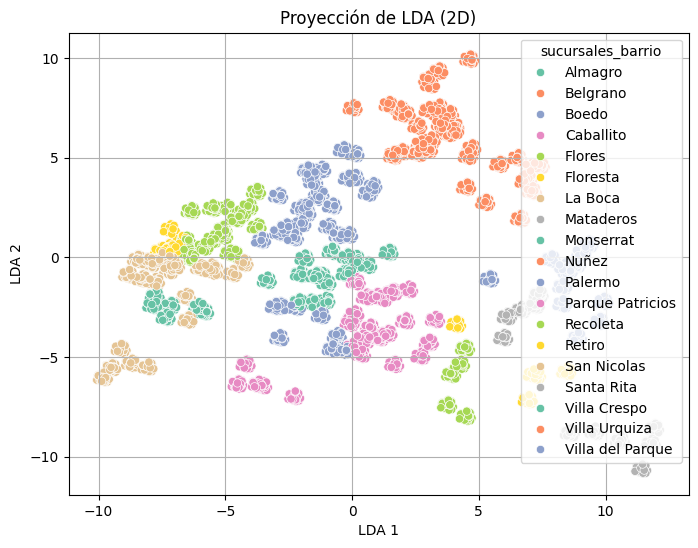

In [545]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda_df['lda_1'], y=X_lda_df['lda_2'], hue=y, palette='Set2')
plt.title('Proyección de LDA (2D)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid(True)
plt.show()

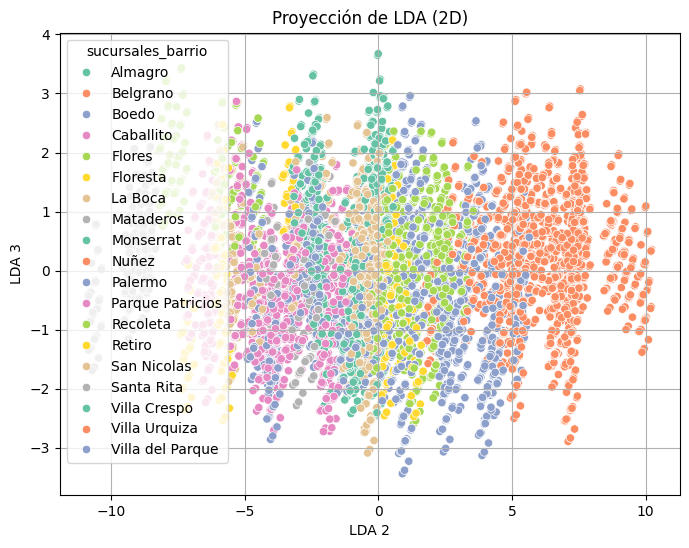

In [567]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda_df['lda_2'], y=X_lda_df['lda_3'], hue=y, palette='Set2')
plt.title('Proyección de LDA (2D)')
plt.xlabel('LDA 2')
plt.ylabel('LDA 3')
plt.grid(True)
plt.show()

### **Uniform Manifold Approximation and Projection (UMAP)**

In [549]:
umap_model = umap.UMAP(n_components=7, random_state=42)
X_umap = umap_model.fit_transform(X_preproc)

/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AdD/ceia_add_tps/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AdD/ceia_add_tps/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [551]:
X_umap_df = pd.DataFrame(X_umap, columns=[f'umap_{i+1}' for i in range(X_lda.shape[1])], index=X_preproc.index)
X_umap_df.head()

,umap_1,umap_2,umap_3,umap_4,umap_5,umap_6,umap_7
256,2.620376,3.559886,4.894976,0.475717,1.939269,1.263168,7.617222
312,2.642339,8.343492,11.217280,-2.041817,2.456389,2.023638,2.772972
318,2.461849,6.936572,4.388094,3.451716,4.046450,3.374063,5.570550
320,12.040128,6.763431,4.215659,2.421602,2.050459,5.029575,1.877697
399,8.233736,3.095909,6.911867,5.700125,3.304699,1.249914,5.346054


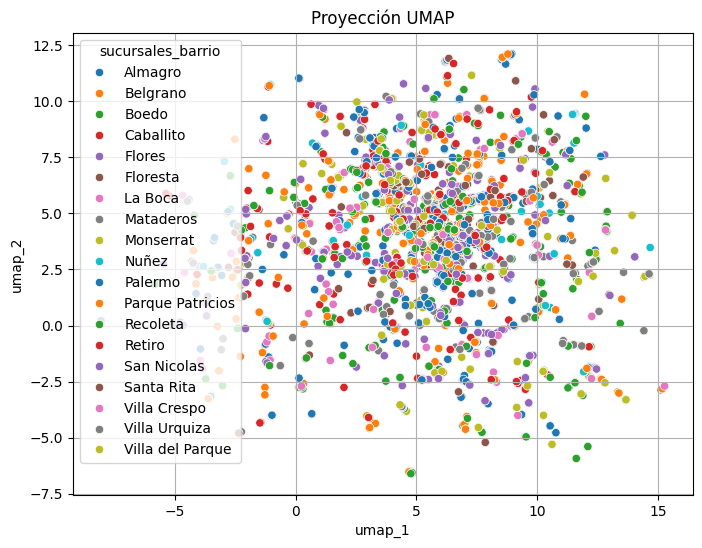

In [563]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_umap_df, x='umap_1', y='umap_2', hue=y, palette='tab10')
plt.title('Proyección UMAP')
plt.grid(True)
plt.show()

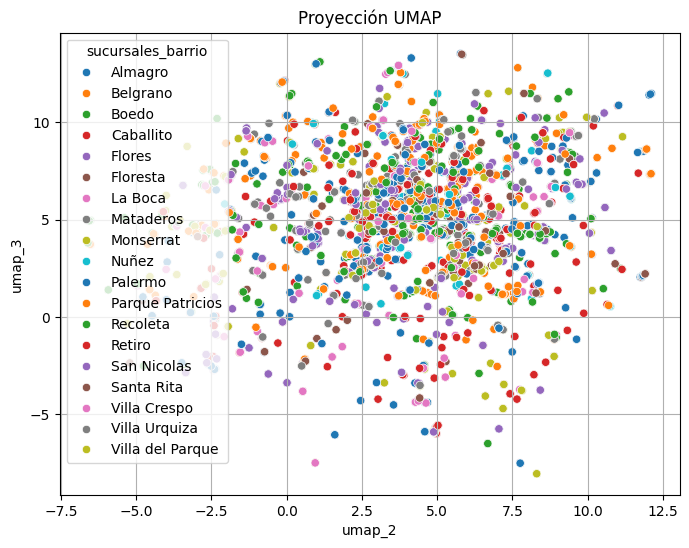

In [564]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_umap_df, x='umap_2', y='umap_3', hue=y, palette='tab10')
plt.title('Proyección UMAP')
plt.grid(True)
plt.show()

Las ventajas de estas reducciones de dimensionalidad se pueden ver del lado de la simplificación de los futuros modelos de machine learning que se nutran de estos datos, dado que que un modelo utilice muchos features no necesariamente implica que es un mejor modelo. Esto también, mejora el entrenamiento permitiendo entrenar modelos con menos tiempo y/o menos capacidad de cómputo.

Las desventajas están dadas por la interpretabilidad del dataset luego de la reducción de dimensiones donde ya no presentamos los datos originales interpretables por un humano. Como se puede ver en las filas impresas luego de las reducciones, las columnas pasan a dejar de tener sentido en el contexto del problema así como también los valores que adoptan.